# Test

## Import Modules

In [1]:
import utils
import functions

import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc
import pandas as pd
from random import randrange
from tqdm import tqdm
# import openai
import os
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from random import randrange
from math import exp
from dotenv import load_dotenv

# 개인 api key
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# openai.api_key = OPENAI_API_KEY

m_num = 3
"""
- `curie:ft-personal-2023-05-31 08-28-50` : csi 데이터 학습
- `curie:ft-personal-2023-06-11 18-10-30` : 總 데이터 사고경위만 학습
- `curie:ft-personal-2023-06-12-06-34-37` : 總 데이터 키워드化하여 사고경위와 함께 학습
"""
ft_models = {1 : "curie:ft-personal-2023-05-31 08-28-50",
            2 : "curie:ft-personal-2023-06-11 18-10-30",
            3 : "curie:ft-personal-2023-06-12-06-34-37"}
pp_datas = {1 : "C:/Users/bhyoo/Desktop/Causual Analysis/CSI_DESKTOP_Test/s_filtered_sieben_codex_v3_prepared.jsonl",
            2 : "C:/Users/bhyoo/Desktop/Causual Analysis/GPT Fine-tuning/prepocess/prepocessed.jsonl",
            3 : "C:/Users/bhyoo/Desktop/Causual Analysis/GPT Fine-tuning/prepocess/prepocessed with keywords.jsonl"}
ft_model = ft_models[m_num]
pp_data = pp_datas[m_num]

Model = functions.FineTuneModel(OPENAI_API_KEY, ft_model)

## Preparing Dataset

In [2]:
data_dir = "C:/Users/bhyoo/Desktop/Causual Analysis/Preprocessed/"
target_file = data_dir + "prepocessed with keywords.csv" 
prepocess_dir = "prepocess/"

# %%
df = pd.read_csv(target_file) [1_001 :] 
df.rename(columns = {"사고경위" : "prompt", "재해유형" : "completion"}, inplace = True)
print(f"Length : {len(df)}")
df.head()


Length : 13855


,completion,prompt,원본 파일
1001,기타,nan#nan#nan#산업설비 > 산업설비공사#nan#nan#nan#nan#80~8...,CSI데이터.xlsx
1002,물체에 맞음,nan#nan#nan#건축 > 해체 및 철거공사#nan#nan#nan#nan#20~...,CSI데이터.xlsx
1003,물체에 맞음,nan#nan#nan#전기설비 > 전기설비공사#nan#nan#nan#nan#80~8...,CSI데이터.xlsx
1004,넘어짐,nan#nan#nan#건축 > 해체 및 철거공사#nan#nan#nan#nan#10%...,CSI데이터.xlsx
1005,"끼임, 깔림",nan#nan#nan#기타 > 기타#nan#nan#nan#nan#30~39%#여름#...,CSI데이터.xlsx


In [3]:
no = randrange(1, 12_855)
# no = 4_333

sample_prompt, sample_completion = functions.sample_loader(df, no)

print(f"[row number] {no}\n[prompt] {sample_prompt}[completion] {sample_completion}")

[row number] 10319
[prompt] nan#nan#nan#건축 > 가설공사#nan#nan#nan#nan#60~69%#가을#낮#크레인장비가 화물차에 자재를 안착시키던 중 재해자가 나무받침대를 제대로 놓기위해 손으로 위치를 이동시키다 자재와 나무받침대 사이에 손가락이 끼어 절단됨

###

[completion] 절단, 베임, 찔림


  1%|▏         | 1/80 [00:00<01:09,  1.14it/s]

[True] 기타 / [Predict] 끼임, 깔림


  2%|▎         | 2/80 [00:01<01:07,  1.15it/s]

[True] 기타 / [Predict] 물체에 맞음


  4%|▍         | 3/80 [00:02<01:18,  1.03s/it]

[True] 기타 / [Predict] 끼임, 깔림


  5%|▌         | 4/80 [00:03<01:11,  1.06it/s]

[True] 기타 / [Predict] 끼임, 깔림


  6%|▋         | 5/80 [00:04<01:08,  1.09it/s]

[True] 기타 / [Predict] 기타


  8%|▊         | 6/80 [00:05<01:05,  1.13it/s]

[True] 기타 / [Predict] 기타


  9%|▉         | 7/80 [00:06<01:02,  1.17it/s]

[True] 기타 / [Predict] 기타


 10%|█         | 8/80 [00:07<01:01,  1.17it/s]

[True] 기타 / [Predict] 기타


 11%|█▏        | 9/80 [00:07<00:59,  1.18it/s]

[True] 기타 / [Predict] 기타


 12%|█▎        | 10/80 [00:08<00:58,  1.19it/s]

[True] 기타 / [Predict] 기타


 14%|█▍        | 11/80 [00:09<00:57,  1.19it/s]

[True] 끼임, 깔림 / [Predict] 떨어짐


 15%|█▌        | 12/80 [00:10<00:56,  1.21it/s]

[True] 끼임, 깔림 / [Predict] 기타


 16%|█▋        | 13/80 [00:11<00:57,  1.17it/s]

[True] 끼임, 깔림 / [Predict] 절단, 베임, 찔림


 18%|█▊        | 14/80 [00:12<01:00,  1.08it/s]

[True] 끼임, 깔림 / [Predict] 끼임, 깔림


 19%|█▉        | 15/80 [00:13<01:02,  1.03it/s]

[True] 끼임, 깔림 / [Predict] 끼임, 깔림


 20%|██        | 16/80 [00:14<00:59,  1.08it/s]

[True] 끼임, 깔림 / [Predict] 물체에 맞음


 21%|██▏       | 17/80 [00:16<01:29,  1.42s/it]

[True] 끼임, 깔림 / [Predict] 끼임, 깔림


 22%|██▎       | 18/80 [00:17<01:17,  1.25s/it]

[True] 끼임, 깔림 / [Predict] 기타


 24%|██▍       | 19/80 [00:19<01:19,  1.31s/it]

[True] 끼임, 깔림 / [Predict] 물체에 맞음


 25%|██▌       | 20/80 [00:20<01:10,  1.18s/it]

[True] 끼임, 깔림 / [Predict] 끼임, 깔림


 26%|██▋       | 21/80 [00:20<01:05,  1.11s/it]

[True] 넘어짐 / [Predict] 넘어짐


 28%|██▊       | 22/80 [00:21<00:59,  1.03s/it]

[True] 넘어짐 / [Predict] 넘어짐


 29%|██▉       | 23/80 [00:22<00:55,  1.02it/s]

[True] 넘어짐 / [Predict] 기타


 30%|███       | 24/80 [00:23<00:52,  1.07it/s]

[True] 넘어짐 / [Predict] 넘어짐


 31%|███▏      | 25/80 [00:24<00:51,  1.07it/s]

[True] 넘어짐 / [Predict] 떨어짐


 32%|███▎      | 26/80 [00:25<00:49,  1.09it/s]

[True] 넘어짐 / [Predict] 기타


 34%|███▍      | 27/80 [00:26<00:47,  1.12it/s]

[True] 넘어짐 / [Predict] 떨어짐


 35%|███▌      | 28/80 [00:27<00:50,  1.04it/s]

[True] 넘어짐 / [Predict] 떨어짐


 36%|███▋      | 29/80 [00:28<00:47,  1.08it/s]

[True] 넘어짐 / [Predict] 끼임, 깔림


 38%|███▊      | 30/80 [00:28<00:44,  1.12it/s]

[True] 넘어짐 / [Predict] 넘어짐


 39%|███▉      | 31/80 [00:29<00:43,  1.13it/s]

[True] 떨어짐 / [Predict] 떨어짐


 40%|████      | 32/80 [00:30<00:42,  1.14it/s]

[True] 떨어짐 / [Predict] 떨어짐


 41%|████▏     | 33/80 [00:31<00:40,  1.15it/s]

[True] 떨어짐 / [Predict] 떨어짐


 42%|████▎     | 34/80 [00:32<00:39,  1.16it/s]

[True] 떨어짐 / [Predict] 떨어짐


 44%|████▍     | 35/80 [00:33<00:38,  1.16it/s]

[True] 떨어짐 / [Predict] 떨어짐


 45%|████▌     | 36/80 [00:34<00:38,  1.16it/s]

[True] 떨어짐 / [Predict] 떨어짐


 46%|████▋     | 37/80 [00:35<00:41,  1.03it/s]

[True] 떨어짐 / [Predict] 떨어짐


 48%|████▊     | 38/80 [00:36<00:38,  1.08it/s]

[True] 떨어짐 / [Predict] 떨어짐


 49%|████▉     | 39/80 [00:36<00:36,  1.12it/s]

[True] 떨어짐 / [Predict] 넘어짐


 50%|█████     | 40/80 [00:37<00:34,  1.15it/s]

[True] 떨어짐 / [Predict] 물체에 맞음


 51%|█████▏    | 41/80 [00:38<00:35,  1.09it/s]

[True] 물체에 맞음 / [Predict] 기타


 52%|█████▎    | 42/80 [00:39<00:33,  1.12it/s]

[True] 물체에 맞음 / [Predict] 떨어짐


 54%|█████▍    | 43/80 [00:40<00:35,  1.03it/s]

[True] 물체에 맞음 / [Predict] 물체에 맞음


 55%|█████▌    | 44/80 [00:41<00:37,  1.03s/it]

[True] 물체에 맞음 / [Predict] 떨어짐


 56%|█████▋    | 45/80 [00:42<00:34,  1.02it/s]

[True] 물체에 맞음 / [Predict] 물체에 맞음


 57%|█████▊    | 46/80 [00:43<00:32,  1.06it/s]

[True] 물체에 맞음 / [Predict] 물체에 맞음


 59%|█████▉    | 47/80 [00:44<00:32,  1.01it/s]

[True] 물체에 맞음 / [Predict] 기타


 60%|██████    | 48/80 [00:46<00:34,  1.07s/it]

[True] 물체에 맞음 / [Predict] 물체에 맞음


 61%|██████▏   | 49/80 [00:46<00:31,  1.00s/it]

[True] 물체에 맞음 / [Predict] 떨어짐


 62%|██████▎   | 50/80 [00:47<00:28,  1.05it/s]

[True] 물체에 맞음 / [Predict] 기타


 64%|██████▍   | 51/80 [00:48<00:26,  1.08it/s]

[True] 부딪힘 / [Predict] 넘어짐


 65%|██████▌   | 52/80 [00:49<00:25,  1.10it/s]

[True] 부딪힘 / [Predict] 부딪힘


 66%|██████▋   | 53/80 [00:50<00:23,  1.13it/s]

[True] 부딪힘 / [Predict] 넘어짐


 68%|██████▊   | 54/80 [00:51<00:22,  1.16it/s]

[True] 부딪힘 / [Predict] 물체에 맞음


 69%|██████▉   | 55/80 [00:51<00:21,  1.18it/s]

[True] 부딪힘 / [Predict] 넘어짐


 70%|███████   | 56/80 [00:52<00:20,  1.20it/s]

[True] 부딪힘 / [Predict] 넘어짐


 71%|███████▏  | 57/80 [00:53<00:19,  1.21it/s]

[True] 부딪힘 / [Predict] 넘어짐


 72%|███████▎  | 58/80 [00:54<00:18,  1.19it/s]

[True] 부딪힘 / [Predict] 기타


 74%|███████▍  | 59/80 [00:55<00:17,  1.17it/s]

[True] 부딪힘 / [Predict] 넘어짐


 75%|███████▌  | 60/80 [00:56<00:16,  1.19it/s]

[True] 부딪힘 / [Predict] 넘어짐


 76%|███████▋  | 61/80 [00:56<00:15,  1.19it/s]

[True] 불균형 및 무리한 동작 / [Predict] 물체에 맞음


 78%|███████▊  | 62/80 [00:57<00:15,  1.19it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 79%|███████▉  | 63/80 [00:58<00:14,  1.19it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 80%|████████  | 64/80 [00:59<00:14,  1.12it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 81%|████████▏ | 65/80 [01:00<00:13,  1.15it/s]

[True] 불균형 및 무리한 동작 / [Predict] 끼임, 깔림


 82%|████████▎ | 66/80 [01:01<00:12,  1.14it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 84%|████████▍ | 67/80 [01:02<00:11,  1.16it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 85%|████████▌ | 68/80 [01:03<00:10,  1.17it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 86%|████████▋ | 69/80 [01:03<00:09,  1.19it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 88%|████████▊ | 70/80 [01:04<00:08,  1.18it/s]

[True] 불균형 및 무리한 동작 / [Predict] 기타


 89%|████████▉ | 71/80 [01:05<00:07,  1.20it/s]

[True] 절단, 베임, 찔림 / [Predict] 절단, 베임, 찔림


 90%|█████████ | 72/80 [01:06<00:06,  1.20it/s]

[True] 절단, 베임, 찔림 / [Predict] 절단, 베임, 찔림


 91%|█████████▏| 73/80 [01:07<00:05,  1.20it/s]

[True] 절단, 베임, 찔림 / [Predict] 끼임, 깔림


 92%|█████████▎| 74/80 [01:07<00:04,  1.20it/s]

[True] 절단, 베임, 찔림 / [Predict] 절단, 베임, 찔림


 94%|█████████▍| 75/80 [01:08<00:04,  1.20it/s]

[True] 절단, 베임, 찔림 / [Predict] 끼임, 깔림


 95%|█████████▌| 76/80 [01:09<00:03,  1.21it/s]

[True] 절단, 베임, 찔림 / [Predict] 물체에 맞음


 96%|█████████▋| 77/80 [01:10<00:02,  1.20it/s]

[True] 절단, 베임, 찔림 / [Predict] 끼임, 깔림


 98%|█████████▊| 78/80 [01:11<00:01,  1.17it/s]

[True] 절단, 베임, 찔림 / [Predict] 끼임, 깔림


 99%|█████████▉| 79/80 [01:12<00:00,  1.18it/s]

[True] 절단, 베임, 찔림 / [Predict] 절단, 베임, 찔림


100%|██████████| 80/80 [01:13<00:00,  1.10it/s]

[True] 절단, 베임, 찔림 / [Predict] 끼임, 깔림


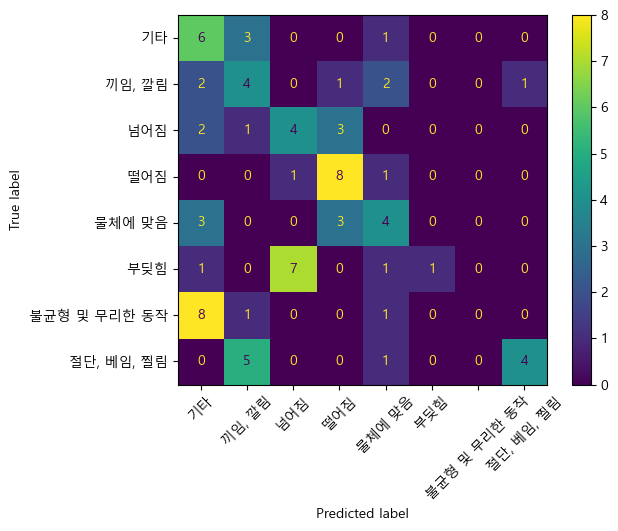

In [30]:
NUM = 12_855
test_size = 100
num_e = 10
classes = ["기타", 
            "끼임, 깔림", 
            "넘어짐", 
            "떨어짐", 
            "물체에 맞음", 
            "부딪힘", 
            "불균형 및 무리한 동작", 
            "절단, 베임, 찔림"]


plt.rcParams['font.family'] = 'Malgun Gothic'
# train_set = pd.read_json(pp_datas[m_num], lines=True)
# X_train, y_train, X_test, y_test = [], [], [] ,[]
L = list()
cnt = 0
if test_size != -1:
    print(f"[INF] Random Mode : Selecting random elements.")
    while(cnt < test_size):
        L.append(randrange(1, NUM))
        cnt += 1

else:
    print(f"[INF] Even Mode : Selecting {str(num_e)} elements for each classes.")
    while(cnt < len(classes) * num_e):
        _n = randrange(1, NUM)
        if df.iloc[_n,  df.columns.get_loc('completion')] == classes[cnt // num_e]:
            L.append(_n)
            cnt += 1

X_test, y_test, predictions = [], [], []
start_time = time()
for _n in tqdm(L):
    # _n = randrange(1, NUM)
    # X_train.append(train_set['prompt'][_n] + "\n\n###\n\n")
    # y_train.append(train_set['completion'][_n])
    _x = df.iloc[_n, df.columns.get_loc('prompt')] + "\n\n###\n\n"
    X_test.append(_x)
    y_test.append(df.iloc[_n,  df.columns.get_loc('completion')])
    predict, _ = Model.run(prompt=_x)
    # print(f"[True] {df.iloc[_n,  df.columns.get_loc('completion')]} / [Predict] {predict}")
    predictions.append(predict)

op_time = time() - start_time

cm = confusion_matrix(y_test, predictions, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

plt.xticks(rotation=45)
plt.show()

print(f"accuracy : {(accuracy_score(y_test, predictions))*100:.3f}%")
print(f"classification report : \n{classification_report(y_test, predictions)}\n")